In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [5]:
import warnings 
warnings.simplefilter('ignore')

In [7]:
df=pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
is_Exited=df['Exited'].value_counts()
print("Yes:",is_Exited[1])
print("No:",is_Exited[0])

Yes: 2037
No: 7963


In [17]:
df.duplicated().sum()

0

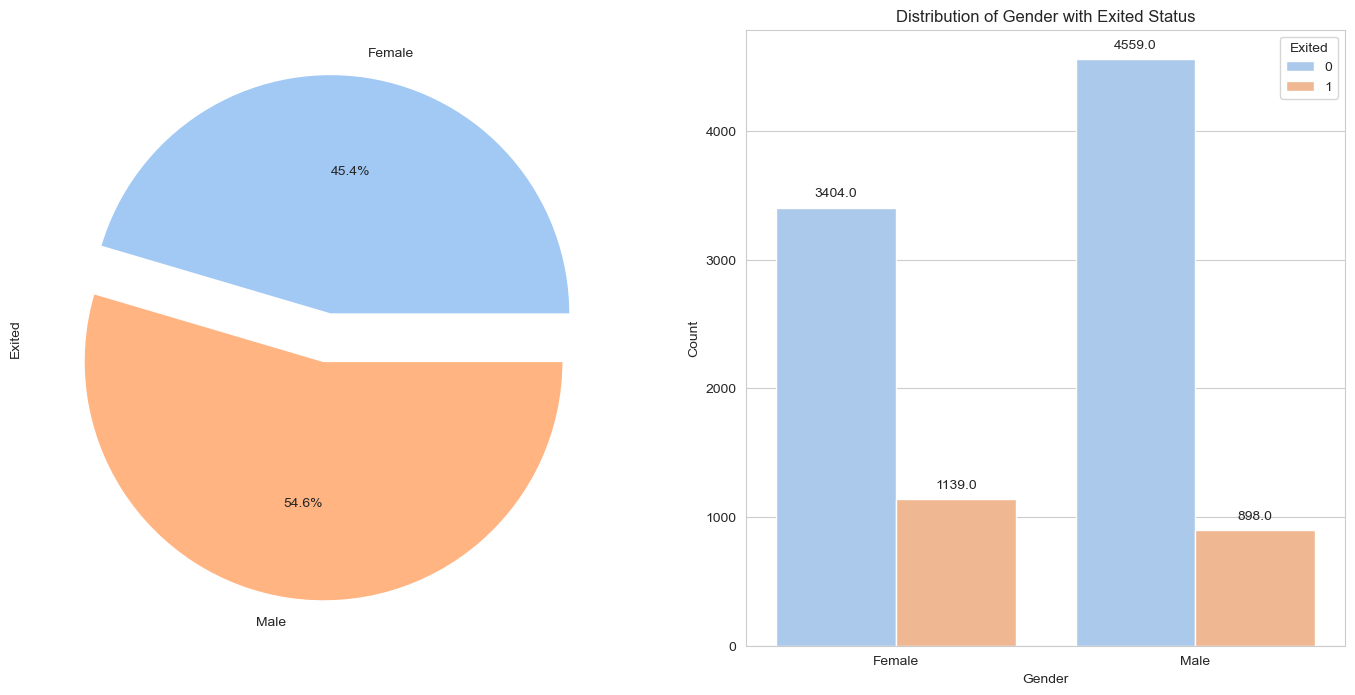

In [19]:
fig,axb=plt.subplots(ncols=2,nrows=1,figsize=(17,8))

# Gender distribution
explode=[0.1,0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode,autopct="%1.1f%%"
                                               ,ax=axb[0])
ax=sns.countplot(x='Gender',hue='Exited',data=df,ax=axb[1])

#Add values on top of each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center' , va='center',xytext=(0,10) , textcoords='offset points')
    
plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()
     

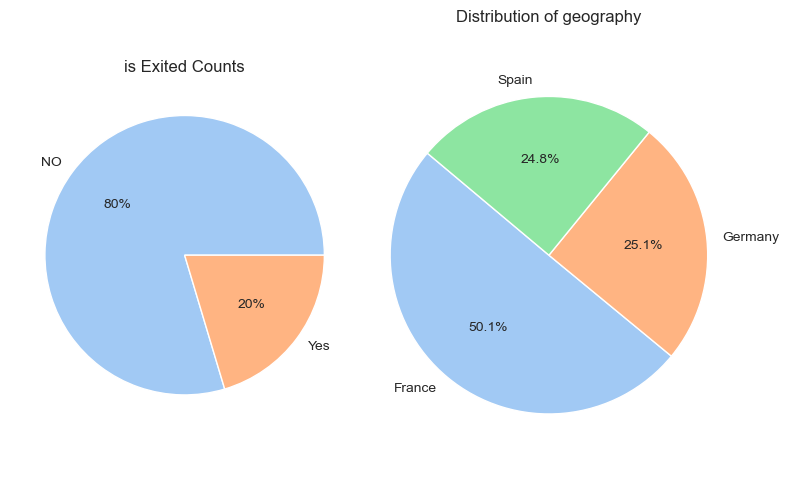

In [21]:
# Exited Counts Pie Chart
is_Exited=df['Exited'].value_counts()
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.pie(is_Exited,labels=["NO","Yes"],autopct="%0.0f%%")
plt.title("is Exited Counts")

plt.subplot(1,2,2)
geography_counts=df['Geography'].value_counts()
plt.pie(geography_counts,labels=geography_counts.index , autopct="%1.1f%%" , startangle=140)
plt.axis('equal')
plt.title('Distribution of geography')
plt.tight_layout()
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

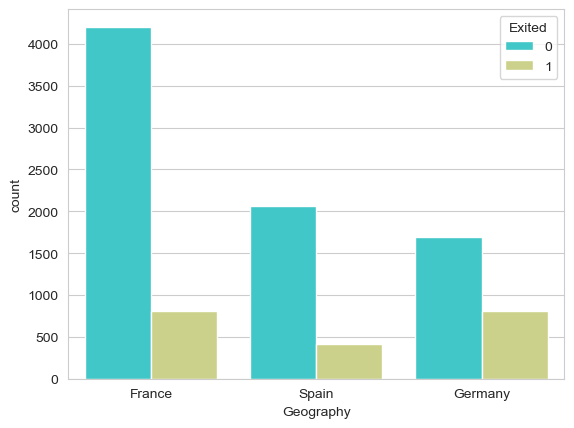

In [23]:
sns.countplot(x='Geography',hue='Exited',data=df , palette='rainbow')

In [25]:
#  remove extra columns
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [27]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0


In [29]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Geography']=le.fit_transform(df['Geography'])
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0


In [31]:
No_class=df[df["Exited"]==0]
Yes_class=df[df["Exited"]==1]

No_class=resample(No_class,replace=False,n_samples=len(Yes_class))
down_samples=pd.concat([Yes_class,No_class],axis=0)

X=down_samples.drop("Exited",axis=1)
Y=down_samples['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=65)

In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [35]:
# Count the occurrences of each class in the original dataset

original_class_counts=df["Exited"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts=down_samples["Exited"].value_counts()

# calculate the % of each class

 # Calculate the percentage of each class
original_percentages = original_class_counts / len(df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

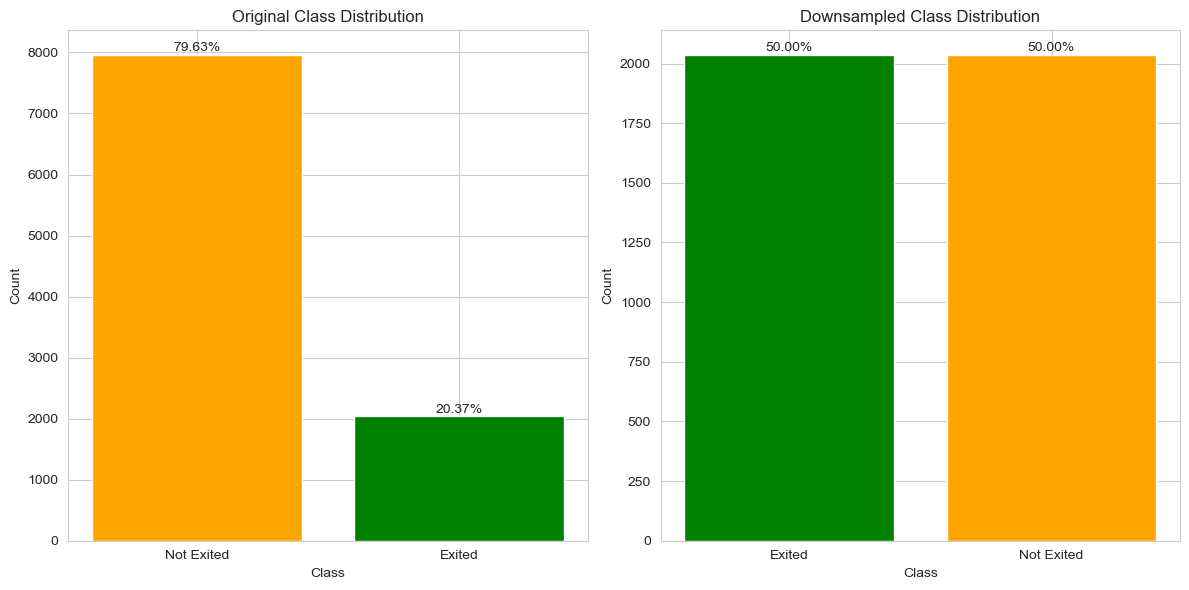

In [37]:
# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Not Exited', 'Exited'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Not Exited', 'Exited'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()
     

In [39]:
# Decision tree
dt=DecisionTreeClassifier(max_depth=(5),random_state=0)
dt.fit(x_train,y_train)
predict_ID3=dt.predict(x_test)
print(classification_report(y_test,predict_ID3))
ID3_accuracy=accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is :{:.2f}'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       410
           1       0.80      0.68      0.74       405

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.75       815
weighted avg       0.76      0.76      0.75       815

ID3 model accuracy is :75.58


In [41]:
# Gradient Boosting 
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(classification_report(y_test,y_pred))
gb_accuracy=accuracy_score(y_test,y_pred)
print('GBoost model accuracy is :{:.2f}'.format(gb_accuracy*100))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       410
           1       0.79      0.75      0.77       405

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815

GBoost model accuracy is :77.67


In [43]:
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       410
           1       0.79      0.77      0.78       405

    accuracy                           0.79       815
   macro avg       0.79      0.79      0.79       815
weighted avg       0.79      0.79      0.79       815

XGBoost model accuracy is: 78.53%


In [45]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       410
           1       0.72      0.69      0.71       405

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

Logistic Regression accuracy is: 71.17%


In [47]:
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))
     

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       410
           1       0.80      0.76      0.78       405

    accuracy                           0.79       815
   macro avg       0.79      0.79      0.79       815
weighted avg       0.79      0.79      0.79       815

Random Forest model accuracy is: 78.65%


In [51]:
Algorithms=['Gradient Boosting','random Forest','XGB','ID3','Logistic regression','SVC']
accuracy=[gb_accuracy,RF_accuracy,XGB_accuracy,ID3_accuracy,LR_accuracy]